In [50]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step0

-check the kraken files.

In [2]:

%%bash
cd week13_data/
cd KRAKEN
less -S SRR492183.kraken

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Step1: Investigate the taxonomic profile of the reads

In [10]:
cd week13_data/
cd KRAKEN
for file in *.kraken
do 
	echo "$file"
	cat $file | tr '[;]'  '[\t]' |sed 's/^..........//'>  "$file".txt
	KtImportText /Users/xiangning/qbb2020-answers/HW10/week13_data/KRAKEN/"$file".txt -o "$file".html
done

Process is interrupted.


## Question1
- During the 8-day development, the percentage of enterococcis faecalis is decreasing, and the percentage of staphylococcus epidermidis is increasing.
- Enterococcus faecalis account for the majority part for the whole 8 days.
- Cutibacterium avidum 44067 start to appear on day7 and increased a lot on day8.

# Step2

### Question 2
- Maybe the length, the GC content and the RPKM.

In [12]:
#indexing
%%bash
cd /Users/xiangning/qbb2020-answers/HW10/week13_data/
bwa index assembly.fasta
#alignment
cd /Users/xiangning/qbb2020-answers/HW10/week13_data/READS/
for sample in SRR492183 SRR492186 SRR492188 SRR492189 SRR492190 SRR492193 SRR492194 SRR492197
do
	bwa mem -R "@RG\tID:${sample}\tSM:${sample}" -t 4 /Users/xiangning/qbb2020-answers/HW10/week13_data/assembly.fasta ${sample}_1.fastq ${sample}_2.fastq > /Users/xiangning/qbb2020-answers/HW10/week13_data/BAM/${sample}.sam
	
done

[bwa_index] Pack FASTA... 0.24 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=76143372, availableWord=17357436
[BWTIncConstructFromPacked] 10 iterations done. 28631228 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 52892140 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 74451276 characters processed.
[bwt_gen] Finished constructing BWT in 31 iterations.
[bwa_index] 16.76 seconds elapse.
[bwa_index] Update BWT... 0.15 sec
[bwa_index] Pack forward-only FASTA... 0.15 sec
[bwa_index] Construct SA from BWT and Occ... 7.18 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index assembly.fasta
[main] Real time: 24.557 sec; CPU: 24.483 sec


In [ ]:
##sorting
for sample in SRR492183 SRR492186 SRR492188 SRR492189 SRR492190 SRR492193 SRR492194 SRR492197
do
	samtools sort "$sample".sam -o "$sample"_sorted.bam
done

In [ ]:
%%bash
# move assembly to the BAM folder
metabat2 -i assembly.fasta -a assembly.fasta.depth.txt -o bins_dir/bin
#MetaBAT 2 (2.15 (Bioconda)) using minContig 2500, minCV 1.0, minCVSum 1.0, maxP 95%, minS 60, maxEdges 200 and minClsSize 200000. with random seed=1607136400
#6 bins (13187322 bases in total) formed.


## Question3
- (A) I got 6 bins.
- (B) They presented 34.4% roughly.
- (C) The size of each bin is 1-3MB, and bacterial genomes can range in size anywhere from about 130 KB to over 14 MB, so they should be fine.
- (D) To align them back to the the bacteria genome to see the covery and correctness.


# Step 3


In [20]:
%%bash
cd ~/qbb2020-answers/HW10/bins
for file in *.fa
do
    head -1 $file|cut -c2- >>heads.txt
done 

grep -f heads.txt /Users/xiangning/qbb2020-answers/HW10/week13_data/KRAKEN/assembly.kraken >> results.txt





## Question 4

In [40]:
f = open("/Users/xiangning/qbb2020-answers/HW10/bins/results.txt", "r")
class_list=[]
for line in f:
    item=[]
    item.append(line.split("\t")[0])
    item.extend(line.split("\t")[1].split(";"))
    class_list.append(item)
    
f.close()
 
name_list=[]
for i,num in zip(class_list,[1,2,3,4,5,6,7,8]):
    print("bin ",num," ",i[-1])
    name_list.append(i[-1])

bin  1   Staphylococcus aureus subsp. aureus CN1

bin  2   Staphylococcus epidermidis RP62A

bin  3   Leuconostoc citreum KM20

bin  4   Staphylococcus lugdunensis HKU09-01

bin  5   Staphylococcus haemolyticus JCSC1435

bin  6   Anaerococcus prevotii DSM 20548

bin  7   Cutibacterium avidum 44067

bin  8   Enterococcus faecalis OG1RF



- (B) Blast the genome to the database to directly find what species they belong to.

# Step4: Make a heatmap of the individual bin abundances over time

In [54]:
data = pd.read_csv("abundance_table.tab",index_col=0,sep='\t') 
data.index = name_list
rslt_df = data.sort_index(axis = 1) 

rslt_df

,SRR492065,SRR492066,SRR492182,SRR492183,SRR492184,SRR492185,SRR492186,SRR492187,SRR492188,SRR492189,SRR492190,SRR492191,SRR492192,SRR492193,SRR492194,SRR492195,SRR492196,SRR492197
Staphylococcus aureus subsp. aureus CN1\n,71.420624,67.688884,54.858154,50.103235,96.383771,175.127948,167.273691,190.391037,102.432386,97.521190,14.523105,14.685431,179.006341,172.449773,53.357374,49.834345,335.756912,72.544371
Staphylococcus epidermidis RP62A\n,7240.045338,7247.577187,4178.397657,4115.242526,11633.667679,9219.720953,9348.741359,9979.380909,8139.870719,8308.156703,5267.858711,5780.879180,6151.257743,6267.155205,6550.505763,6646.119922,11597.033828,8745.103316
Leuconostoc citreum KM20\n,6.087799,5.406628,1.986297,1.751119,31.799458,9.170054,8.887730,37.581807,5.838109,5.929623,4.583909,4.652603,1.629252,1.804228,3.259988,3.451473,8.348499,19.275630
Staphylococcus lugdunensis HKU09-01\n,1869.640953,2034.534641,1232.387641,1566.783656,670.257316,0.747395,0.552469,108.026882,0.875860,0.356678,1.251430,0.772755,282.011644,315.740755,457.543378,593.767516,0.436084,4250.653466
Staphylococcus haemolyticus JCSC1435\n,427.134461,392.881731,1427.905710,1335.147536,1027.807284,850.342196,820.872805,2391.501197,1033.761424,999.273162,1071.641137,1136.902519,1719.723610,1670.022745,1187.660153,1143.743857,1884.339618,936.681889
Anaerococcus prevotii DSM 20548\n,714.809488,681.886830,2.467008,1.287979,2124.191118,2.312693,1.452063,7.140755,1.347894,0.747525,3.287205,1.496781,7.175036,6.459688,1124.427189,1093.414384,3.084744,590.194971
Cutibacterium avidum 44067\n,3498.783627,3219.448810,0.223916,0.186461,889.316796,0.181546,0.065351,1.199693,4.223711,0.979570,0.259990,0.088835,4.114233,1.211367,73.851083,71.465536,0.698382,3366.910935
Enterococcus faecalis OG1RF\n,24.206000,23.178964,2.759951,2.555610,1.259343,6.237916,6.194380,137.042032,0.475050,0.333899,0.491073,0.523699,79.491024,78.291586,6.639770,6.668268,1.563200,10.595311


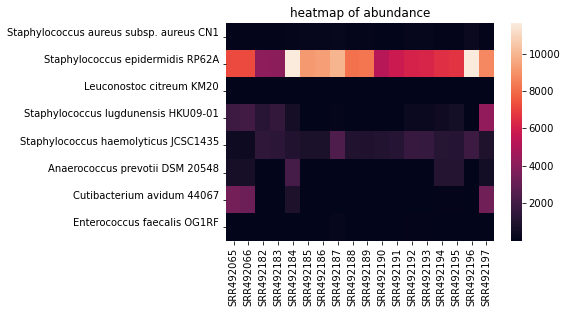

In [55]:
sns.heatmap(rslt_df)
plt.title('heatmap of abundance')
plt.savefig("heatmap of abundance'.png")
plt.show()

- It corresponds to the result that staphylococcus epidermidis is the most abundant.
- It also corresponds to the change tendency of cutibacterium avidum as it start to be aundant on the last day.